## Change values for analysis based on the cell 
### Baseline 
#### Change first and last sweep number for each cell based off of when the cell got stable

In [5]:
pre_drug_first_sweep = 11
pre_drug_last_sweep = 25

### Drug wash on

In [6]:
wash_on_first_sweep = 61
wash_on_last_sweep = 75

### Plus APV

In [7]:
APV_first_sweep = 85
APV_last_sweep = 90

### Import packages you want

In [8]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Read in Files

In [10]:
data = loadmat("/Users/joyadler/Desktop/FordLab/RawData/20221017_005.mat")
print("total sweeps: " + str(len(data)))

total sweeps: 94


In [11]:
for i in range(len(data)):
    first_sweep_key = list(data.keys())[i]
    first_value = data[first_sweep_key]

    print(first_sweep_key)
    print(first_value)
    print(' ')


__header__
b'MATLAB 5.0 MAT-file, Platform: MACOSX, Created on: Thu Aug 3 2023  09:20:12\x002\x00/\x002\x000\x002\x002\x001\x000\x001\x007\x00_\x000\x000\x005\x00.\x00m\x00a\x00t\x000\x000'
 
__version__
1.0
 
__globals__
[]
 
c001_Time    N  
[[1.0000e-04 2.0000e-04 3.0000e-04 ... 1.9998e+00 1.9999e+00 2.0000e+00]]
 
c002_Current_Amp1   p 1 
[[-1.0633125e-11 -9.8306250e-12 -1.4110625e-11 ... -2.0664375e-11
  -3.3504375e-11 -1.1034375e-11]]
 
c003_Current_Amp1   p 1 
[[-2.7418750e-11 -2.4275625e-11 -3.2434375e-11 ... -5.1426875e-11
  -5.2028750e-11 -6.1859375e-11]]
 
c004_Current_Amp1   p 1 
[[-7.29606250e-11 -6.48018750e-11 -6.70756250e-11 ... -1.04391875e-10
  -1.05996875e-10 -9.48287500e-11]]
 
c005_Current_Amp1   p 1 
[[-8.59343750e-11 -8.03168750e-11 -8.94118750e-11 ... -1.00580000e-10
  -1.09474375e-10 -9.80387500e-11]]
 
c006_Current_Amp1   p 1 
[[-1.50803125e-10 -1.46255625e-10 -1.41173125e-10 ... -1.35823125e-10
  -1.47593125e-10 -1.40303750e-10]]
 
c007_Current_Amp1   p 1 
[[

## Clean up data and get rid of keys

In [12]:
new_data = data.copy()  # Create a copy of the original dictionary

for i in range(4):  # Remove the first three keys from the copy
    first_sweep_key = list(new_data.keys())[0]
    new_data.pop(first_sweep_key)

for i in range(len(new_data.keys())):  
    first_sweep_key = list(new_data.keys())[i]
    first_value = new_data[first_sweep_key]

    print(first_sweep_key)
    print(first_value)
    print(' ')

#pA = np.array(new_data).flatten()
#new_data_df = pd.DataFrame(new_data)
#new_data_df.to_csv('/Users/joyadler/Desktop/df/data.csv')

c002_Current_Amp1   p 1 
[[-1.0633125e-11 -9.8306250e-12 -1.4110625e-11 ... -2.0664375e-11
  -3.3504375e-11 -1.1034375e-11]]
 
c003_Current_Amp1   p 1 
[[-2.7418750e-11 -2.4275625e-11 -3.2434375e-11 ... -5.1426875e-11
  -5.2028750e-11 -6.1859375e-11]]
 
c004_Current_Amp1   p 1 
[[-7.29606250e-11 -6.48018750e-11 -6.70756250e-11 ... -1.04391875e-10
  -1.05996875e-10 -9.48287500e-11]]
 
c005_Current_Amp1   p 1 
[[-8.59343750e-11 -8.03168750e-11 -8.94118750e-11 ... -1.00580000e-10
  -1.09474375e-10 -9.80387500e-11]]
 
c006_Current_Amp1   p 1 
[[-1.50803125e-10 -1.46255625e-10 -1.41173125e-10 ... -1.35823125e-10
  -1.47593125e-10 -1.40303750e-10]]
 
c007_Current_Amp1   p 1 
[[-1.55885625e-10 -1.45854375e-10 -1.53946250e-10 ... -1.61436250e-10
  -1.70531250e-10 -1.71668125e-10]]
 
c008_Current_Amp1   p 1 
[[-1.54280625e-10 -1.46790625e-10 -1.63910625e-10 ... -1.59095625e-10
  -1.56220000e-10 -1.72871875e-10]]
 
c009_Current_Amp1   p 1 
[[-1.76951250e-10 -1.74410000e-10 -1.68993125e-10 ... -1

## Convert the sweep number to minutes to graph changes in the amplitude of response over time 

In [13]:


# Create a new dictionary to store the correlated data
time_correlate = {}

# Calculate the time in minutes for each sweep and add it to the new dictionary
for i, sweep_key in enumerate(new_data.keys()):
    sweep_time_minutes = i * 0.3333  # Each sweep occurs every 20 seconds (0.3333 minutes)
    time_correlate[sweep_time_minutes] = new_data[sweep_key]

    print("Time (minutes):", sweep_time_minutes)
    print("Sweep data:", time_correlate[sweep_time_minutes])
    print(' ')

# The 'time_correlate' dictionary now contains the sweeps correlated to their respective time in minutes

Time (minutes): 0.0
Sweep data: [[-1.0633125e-11 -9.8306250e-12 -1.4110625e-11 ... -2.0664375e-11
  -3.3504375e-11 -1.1034375e-11]]
 
Time (minutes): 0.3333
Sweep data: [[-2.7418750e-11 -2.4275625e-11 -3.2434375e-11 ... -5.1426875e-11
  -5.2028750e-11 -6.1859375e-11]]
 
Time (minutes): 0.6666
Sweep data: [[-7.29606250e-11 -6.48018750e-11 -6.70756250e-11 ... -1.04391875e-10
  -1.05996875e-10 -9.48287500e-11]]
 
Time (minutes): 0.9999
Sweep data: [[-8.59343750e-11 -8.03168750e-11 -8.94118750e-11 ... -1.00580000e-10
  -1.09474375e-10 -9.80387500e-11]]
 
Time (minutes): 1.3332
Sweep data: [[-1.50803125e-10 -1.46255625e-10 -1.41173125e-10 ... -1.35823125e-10
  -1.47593125e-10 -1.40303750e-10]]
 
Time (minutes): 1.6664999999999999
Sweep data: [[-1.55885625e-10 -1.45854375e-10 -1.53946250e-10 ... -1.61436250e-10
  -1.70531250e-10 -1.71668125e-10]]
 
Time (minutes): 1.9998
Sweep data: [[-1.54280625e-10 -1.46790625e-10 -1.63910625e-10 ... -1.59095625e-10
  -1.56220000e-10 -1.72871875e-10]]
 
Ti

## Plot all traces

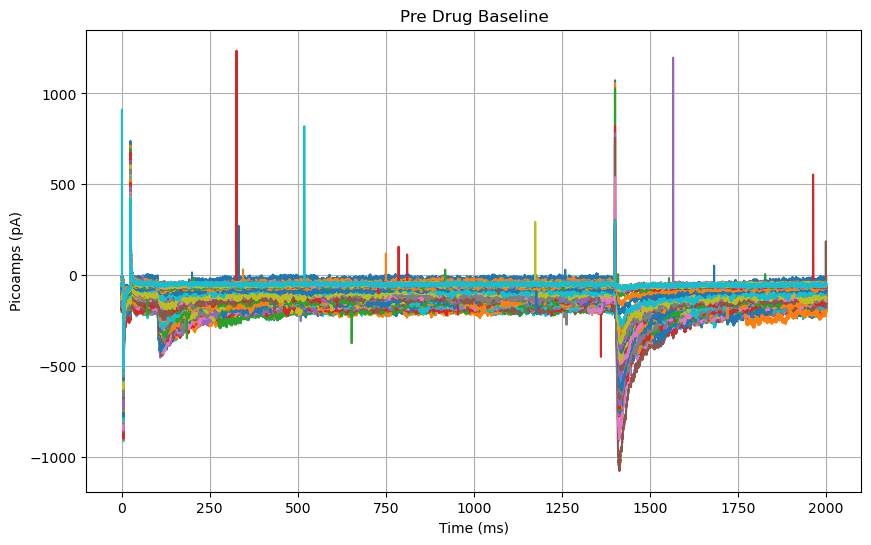

In [14]:
plt.figure(figsize=(10, 6))  # Create a new figure to look at your sweeps


# Plot pA data over time for each trial
for trial_name, pA in list(new_data.items()):
    pA = np.array(pA).flatten()  # flatten the array becuase it is 2D
    times = np.linspace(0, len(pA)/10, len(pA))  # create a time array
    plt.plot(times, pA * 1e12)  # multiplying by 1e12 to convert the unit from A to pA
   # break  # Break the loop after the first iteration
    

#plt.ylim(-800, 800) # adjust data range in pA
#plt.xlim(1250, 1500) # adjust this according to your data range in pA

plt.xlabel('Time (ms)')  # Add a label to the x-axis
plt.ylabel('Picoamps (pA)')  # Add a label to the y-axis
plt.title('Pre Drug Baseline')  # Add a title

plt.grid(True)  # Show grid lines (optional)

plt.show()  # Display the plot

## Make function to graph sweeps

In [15]:
# Changed function to make the sweep numbers an input you can change 

def plot_sweeps(new_data, start_time, end_time, initial_sweep, final_sweep): 
    plt.figure(figsize=(10, 6))

    # Plot pA data over time for each trial
    for trial_name, pA in list(new_data.items())[initial_sweep:final_sweep]:
        pA = np.array(pA).flatten()  # flatten the array becuase it is 2D
        times = np.linspace(0, len(pA)/10, len(pA))  # create a time array
        plt.plot(times, pA * 1e12)  # multiplying by 1e12 to convert the unit from A to pA
        #break  # Break the loop after the first iteration
        
    #look only at specific time points for your base amp pre stim
    plt.ylim(-1000, 800) # adjust data range in pA
    plt.xlim(start_time, end_time) # adjust this according to your data range in pA


    plt.xlabel('Time (ms)')  # Add a label to the x-axis
    plt.ylabel('Picoamps (pA)')  # Add a label to the y-axis
    plt.title('Base amp')  # Add a title

    plt.grid(True)    


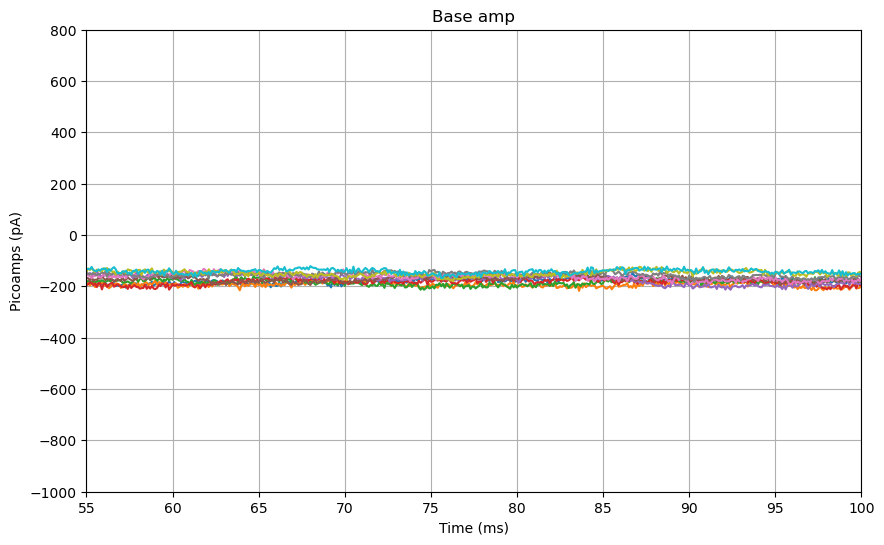

In [16]:
plot_sweeps(new_data, 55,100, 10,20)

## Make funcitons to find the values for your baseline amplitude
### pre_drug

In [17]:

def calculate_average_baseline_amp(new_data, pre_drug_first_sweep, pre_drug_last_sweep,baseline_window = (550, 1000)): #use these values because you already defined the beginning and end 
    count = 0
    total = np.zeros(baseline_window[1]-baseline_window[0]) #np.zeros lets you fill in as you go from start to end of your set times 
    

    for sweep, value in enumerate(new_data.values()): #enumerate lets you run throgh the list of your keys
        if pre_drug_first_sweep <= sweep <= pre_drug_last_sweep:
            count += 1
            total += value[0][baseline_window[0]:baseline_window[1]] #value[0] becuase you have a nested list, one is the list itself and one is the values
            #print(baseline_window)
          

    
            #to get just the values, you want to index to them
    if count == 0:
        return None  # Return None if there are no data points in the specified time period
    else:
        return total / count

average_baseline_pre_drug = calculate_average_baseline_amp(new_data, pre_drug_first_sweep,pre_drug_last_sweep)
baseline_avg_pre_drug = np.average(average_baseline_pre_drug)
pA_avg_pre_drug = baseline_avg_pre_drug*(10 ** 12)
print(pA_avg_pre_drug)

-157.9849550925926


### wash_on baseline

In [18]:
def calculate_average_baseline_amp_wash_on(new_data, wash_on_first_sweep, wash_on_last_sweep,baseline_window1 = (550, 1000)): #use these values because you already defined the beginning and end 
    count = 0
    total = np.zeros(baseline_window1[1]-baseline_window1[0]) #np.zeros lets you fill in as you go from start to end of your set times 
    

    for sweep, value1 in enumerate(new_data.values()): #enumerate lets you run throgh the list of your keys
        if wash_on_first_sweep <= sweep <= wash_on_last_sweep:
            count += 1
            total += value1[0][baseline_window1[0]:baseline_window1[1]] #value[0] becuase you have a nested list, one is the list itself and one is the values

            # print(value[0][baseline_window[0]:baseline_window[1]])
            #to get just the values, you want to index to them
    if count == 0:
        return None  # Return None if there are no data points in the specified time period
    else:
        return total / count


average_baseline_value_wash_on = calculate_average_baseline_amp_wash_on(new_data, wash_on_first_sweep, wash_on_last_sweep)
# print(average_value) #output is giving average for each sweep, then you have to take the average of the averages to get the baseline value you need


baseline_avg_wash_on = np.average(average_baseline_value_wash_on)
pA_avg_wash_on = baseline_avg_wash_on*(10 ** 12)
print(pA_avg_wash_on)

-95.93263333333333


### APV Baseline

In [21]:
def calculate_average_baseline_amp_APV(new_data, APV_first_sweep, APV_last_sweep,baseline_window2 = (550, 1000)): #use these values because you already defined the beginning and end 
    count = 0
    total = np.zeros(baseline_window2[1]-baseline_window2[0]) #np.zeros lets you fill in as you go from start to end of your set times 
    

    for sweep, value in enumerate(new_data.values()): #enumerate lets you run throgh the list of your keys
        if APV_first_sweep <= sweep <= APV_last_sweep:
            count += 1
            total += value[0][baseline_window2[0]:baseline_window2[1]] #value[0] becuase you have a nested list, one is the list itself and one is the values

            # print(value[0][baseline_window[0]:baseline_window[1]])
            #to get just the values, you want to index to them
    if count == 0:
        return None  # Return None if there are no data points in the specified time period
    else:
        return total / count


average_baseline_value_APV = calculate_average_baseline_amp_APV(new_data, APV_first_sweep, APV_last_sweep)
# print(average_value) #output is giving average for each sweep, then you have to take the average of the averages to get the baseline value you need


baseline_avg_APV = np.average(average_baseline_value_APV)
pA_avg_APV = baseline_avg_APV*(10 ** 12)
print(pA_avg_APV)

-49.25813361111111


## Find values of peak (min) response


## Find the min amplitude of first response
### pre_drug first peak

In [32]:
def calculate_average_peak_pre_drug(new_data, pre_drug_first_sweep, pre_drug_last_sweep,peak_window = (100, 150)): #use these values because you already defined the beginning and end 
    count = 0
    total = np.zeros(peak_window[1]-peak_window[0]) #np.zeros lets you fill in as you go from start to end of your set times 
    

    for first_peak, value in enumerate(new_data.values()): #enumerate lets you run throgh the list of your keys
        if pre_drug_first_sweep <= first_peak <= pre_drug_last_sweep:
            count += 1
            total += min(value[0][peak_window[0]:peak_window[1]]) #value[0] becuase you have a nested list, one is the list itself and one is the values
            #to get just the values, you want to index to them

    if count == 0:
        return None  # Return None if there are no data points in the specified time period
    else:
        return total / count

first_peak_pre_drug = calculate_average_first_peak_pre_drug(new_data, pre_drug_first_sweep, pre_drug_last_sweep,peak_window = (100, 150))
# print(average_value) #output is giving average for each sweep, then you have to take the average of the averages to get the baseline value you need


first_peak_avg_pre_drug = np.average(first_peak_pre_drug)
pA_first_peak_pre_drug = first_peak_avg_pre_drug*(10 ** 12)
print(pA_first_peak_pre_drug)

-234.32554166666665


### pre_drug second peak 

In [33]:
second_peak_pre_drug = calculate_average_peak_pre_drug(new_data, pre_drug_first_sweep, pre_drug_last_sweep,peak_window = (1405, 1450))
# print(average_value) #output is giving average for each sweep, then you have to take the average of the averages to get the baseline value you need


second_peak_pre_drug = np.average(second_peak_pre_drug)
pA_second_peak_pre_drug = second_peak_pre_drug*(10 ** 12)
print(pA_second_peak_pre_drug)

-318.95362499999993


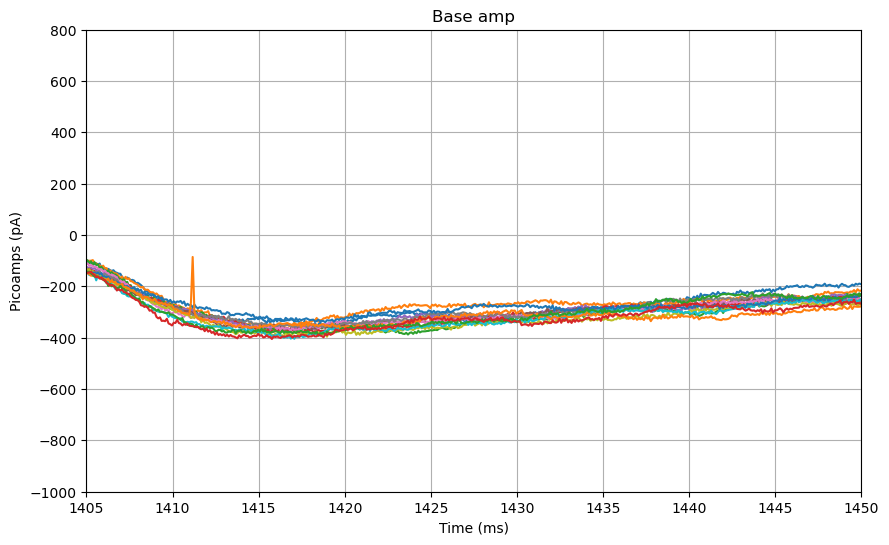

In [34]:
plot_sweeps(new_data, 1405,1450, 61,75)

### wash_on first peak

In [46]:
def calculate_average_peak_wash_on(new_data, wash_on_first_sweep, wash_on_last_sweep, peak_window = (100, 150)): #use these values because you already defined the beginning and end 
    count = 0
    total = np.zeros(peak_window[1]-peak_window[0]) #np.zeros lets you fill in as you go from start to end of your set times 
    

    for first_peak, value in enumerate(new_data.values()): #enumerate lets you run throgh the list of your keys
        if wash_on_first_sweep <= first_peak <= wash_on_last_sweep:
            count += 1
            total += min(value[0][peak_window[0]:peak_window[1]]) #value[0] becuase you have a nested list, one is the list itself and one is the values
            #to get just the values, you want to index to them

    if count == 0:
        return None  # Return None if there are no data points in the specified time period
    else:
        return total / count

first_peak_wash_on = calculate_average_peak_wash_on(new_data, wash_on_first_sweep, wash_on_last_sweep,peak_window = (100, 150))
# print(average_value) #output is giving average for each sweep, then you have to take the average of the averages to get the baseline value you need


first_peak_avg_wash_on = np.average(first_peak_wash_on)
pA_first_peak_wash_on = first_peak_avg_wash_on*(10 ** 12)
print(pA_first_peak_wash_on)



-180.69625000000002


### wash_on second peak

In [47]:
average_second_peak_value_wash_on = calculate_average_peak_wash_on(new_data, wash_on_first_sweep, wash_on_last_sweep, peak_window = (1405, 1450))
first_peak_avg_wash_on = np.average(average_first_peak_value_wash_on)
pA_first_peak_wash_on = first_peak_avg_wash_on*(10 ** 12)
print(pA_first_peak_wash_on)

-180.69625000000002


### APV first peak

In [ ]:
average_first_peak_value_APV = calculate_average_first_peak(new_data, APV_first_sweep1, APV_last_sweep1)
#output is giving average for each sweep, then you have to take the average of the averages to get the baseline value you need

first_peak_avg_APV = np.average(average_first_peak_value_APV)
pA_first_peak_APV = first_peak_avg_APV*(10 ** 12)
print(pA_first_peak_APV)

-127.63762500000003


### APV second peak

## then get values of responses

In [ ]:
def calc_first_response_pre_drug(pA_avg_pre_drug, pA_first_peak_pre_drug):
    first_response_pre_drug = pA_avg_pre_drug - pA_first_peak_pre_drug
print(first_response_pre_drug)

76.34058657407405


## Normalize 

## add series resistance calculation over time 

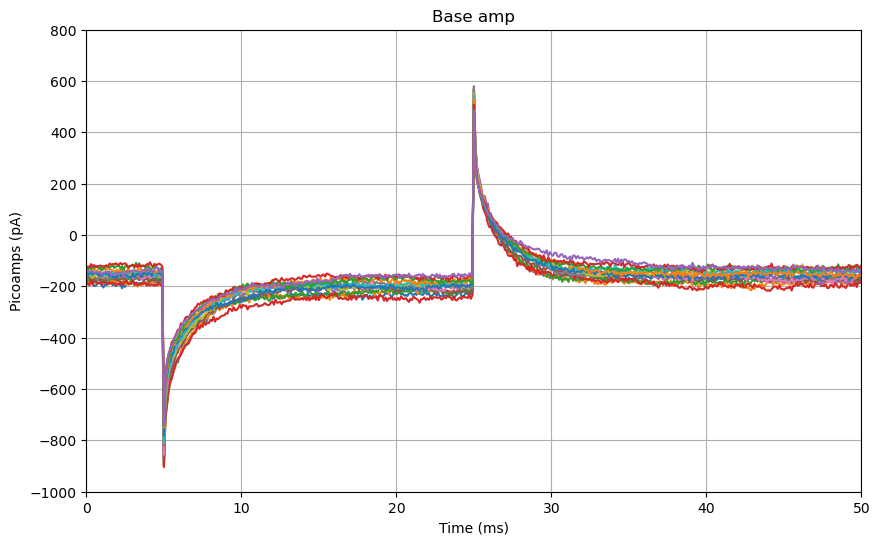

In [53]:
plot_sweeps(new_data, 0,50, 10, 25)

In [2]:
# in 4mV step, find peak of down inflection and divide 
# .004/ current response X whatever you need to get it to pA
# 
# input is average of flat part 



NameError: name 'plot_sweeps' is not defined

## Export into table 